In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set(style="darkgrid", palette="pastel")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
target = pd.DataFrame(boston.target)

In [3]:
bos.shape

(506, 13)

In [4]:
target.shape

(506, 1)

In [5]:
bos.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
bos = bos.rename(columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO',
                      11:'B', 12:'LSTAT'})
target = target.rename(columns={0:'MEDV'})

data = pd.concat([bos, target], axis=1)

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Features description

`CRIM` per capita: crime rate by town

`ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.

`INDUS`: proportion of non-retail business acres per town

`CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

`NOX`: nitric oxides concentration (parts per 10 million)

`RM`: average number of rooms per dwelling

`AGE`: proportion of owner-occupied units built prior to 1940

`DIS`: weighted distances to five Boston employment centres

`RAD`: index of accessibility to radial highways

`TAX`: full-value property-tax rate per 10,000usd

`PTRATIO`: pupil-teacher ratio by town

`B` : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

`LSTAT`: % lower status of the population

`MEDV `--> our resident value target

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB



No null values and no categorical features. COOL!😍

In [10]:
data.duplicated().sum()

0

No duplicate value in this dataset. WOW!😘

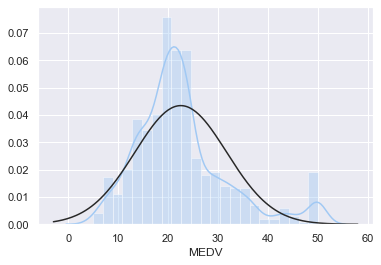

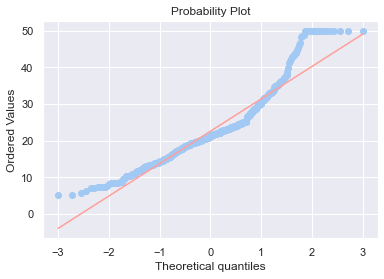

In [22]:
# Lets take a look at dependent feature i.e, MEDV

sns.distplot(data['MEDV'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(data['MEDV'], plot=plt)
plt.show()

We can handle target features easily later.

In [24]:
# data['MEDV'] = np.log(data['MEDV'])

In [25]:
# sns.distplot(data['MEDV'], fit=stats.norm)
# fig = plt.figure()
# res = stats.probplot(data['MEDV'], plot=plt)
# plt.show()

    Better than before, but still we will tune it more later but let see results first.

In [26]:
# Let's try to apply descriptive and inferential statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


##### 1
In the very first CRIM column, we can see that mean is ~3.7 and stnadard deviation is ~8.6
this column may be affected by huge outliers. let see CRIM Feature

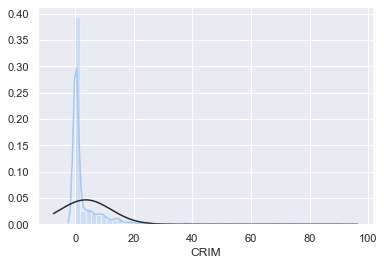

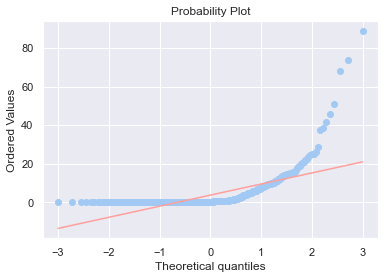

In [27]:
sns.distplot(data['CRIM'], fit=stats.norm)
# let see Q-Q Plot too
fig = plt.figure()
res = stats.probplot(data['CRIM'], plot=plt)
plt.show()

Our hypothesis was correct , this column is too much impacted by outliers.

In [28]:
# Let's have a look on very powerful pair plot

In [29]:
# sns.pairplot(data, diag_kind='kde')
# plt.show()

         From the above plot, i will pick up some of the features and then we will explore those features one by one

In [30]:
cols = ['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

def box_dis(data, cols=[]):
    sns.set(style="darkgrid", palette="pastel")
    for col in cols:
        mean = data[col].mean()
        median = data[col].median()
        mode = data[col].mode()[0]
        
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
        
        sns.boxplot(data[col], ax=ax_box)
        ax_box.axvline(mean, color='r', linestyle='--')
        ax_box.axvline(median, color='g', linestyle='-')
        ax_box.axvline(mode, color='b', linestyle='-')
        ax_box.set_ylabel(col, fontsize=15)
        
        sns.distplot(data[col], ax=ax_hist)
        ax_hist.axvline(mean, color='r', linestyle='--')
        ax_hist.axvline(median, color='g', linestyle='-')
        ax_hist.axvline(mode, color='b', linestyle='-')
        
        plt.legend({'mean':mean, 'Median':median, 'Mode':mode})
        ax_box.set(xlabel='')
        plt.show()

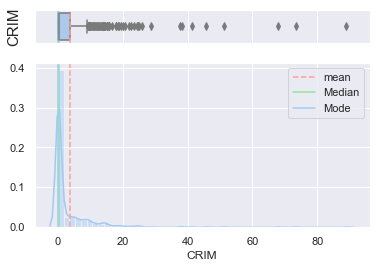

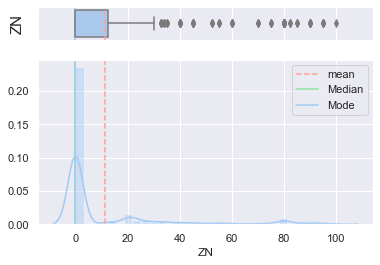

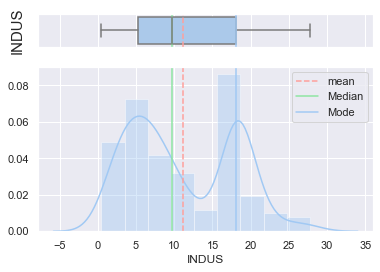

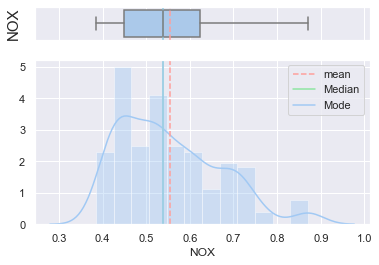

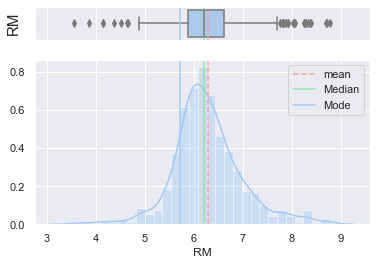

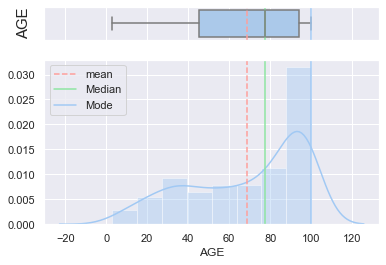

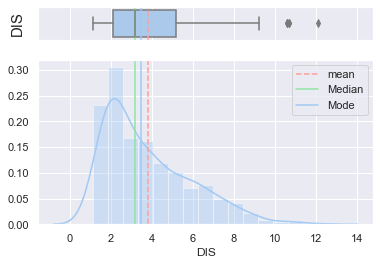

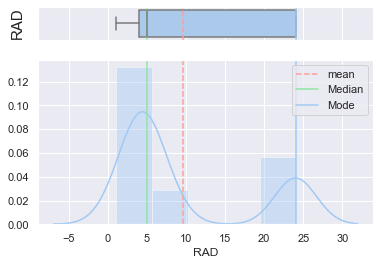

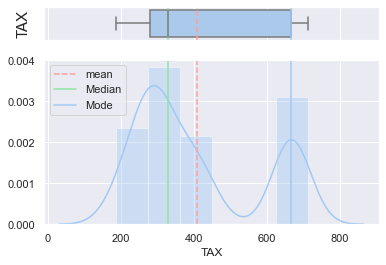

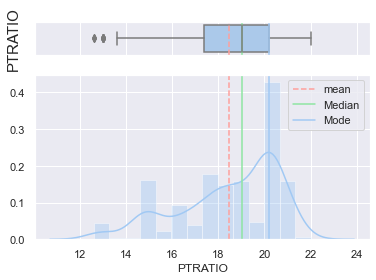

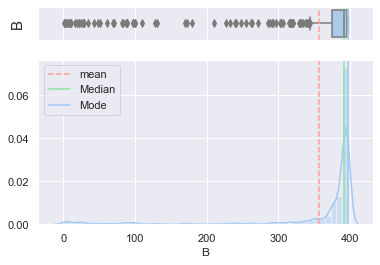

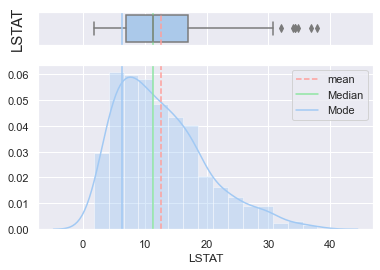

In [31]:
box_dis(data=data, cols=cols)

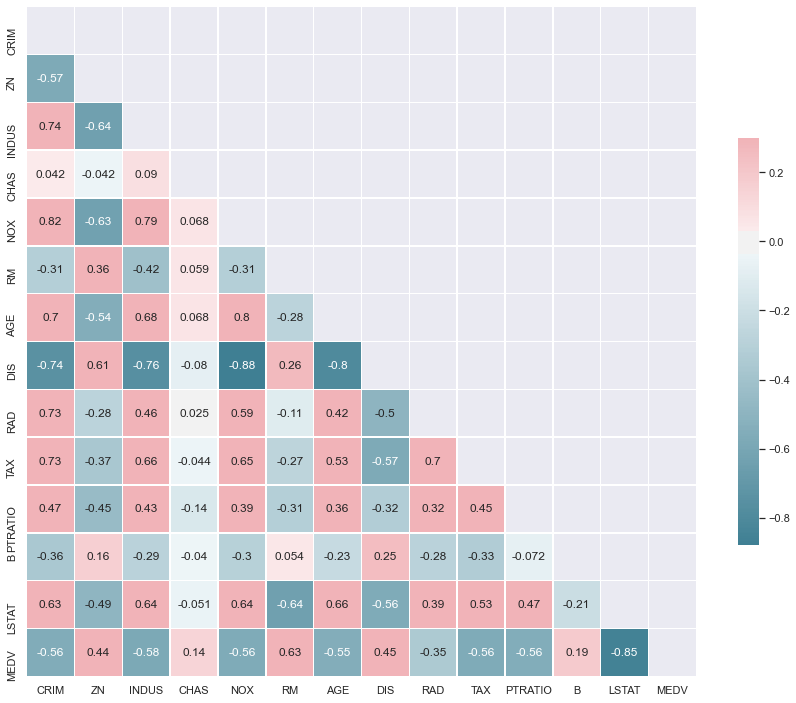

In [32]:
corr_data = data
corr = corr_data.corr(method="spearman")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

In [33]:
X = data[['RM','ZN','LSTAT','TAX','PTRATIO','AGE','DIS','NOX']]
y = data['MEDV']


In [34]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [36]:
vif

,VIF,Features
0,1.814534,RM
1,2.246320,ZN
2,2.735706,LSTAT
3,2.532454,TAX
4,1.713682,PTRATIO
5,3.056216,AGE
6,3.727958,DIS
7,4.005447,NOX


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity.Here we don't have any feature whose value is greater than 5. NICE!👌

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Shape of X train :", X_train.shape)
print("Shape of y train :", y_train.shape)
print("="*30)
print("Shape of X test :", X_test.shape)
print("Shape of y test :", y_test.shape)

Shape of X train : (354, 8)
Shape of y train : (354,)
Shape of X test : (152, 8)
Shape of y test : (152,)


In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
print("Slope 'm' is :", lr.intercept_)
print("="*50)

cols = ['RM','ZN','LSTAT','TAX','PTRATIO','AGE','DIS','NOX']
i=0
for col in cols:
    print('The Coefficient of ',col, ' is: ',lr.coef_[i])
    i=i+1

Slope 'm' is : 22.543793774353407
The Coefficient of  RM  is:  2.944250546534624
The Coefficient of  ZN  is:  0.6380991090992616
The Coefficient of  LSTAT  is:  -4.370266430895118
The Coefficient of  TAX  is:  -0.40683876124431084
The Coefficient of  PTRATIO  is:  -1.8102206739227125
The Coefficient of  AGE  is:  -0.3144277949462192
The Coefficient of  DIS  is:  -2.796994502524817
The Coefficient of  NOX  is:  -1.4027514990318521


In [40]:
lm = smf.ols(formula='MEDV ~ RM + ZN + LSTAT + TAX + PTRATIO + AGE + DIS + NOX', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     154.1
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          2.33e-129
Time:                        05:19:02   Log-Likelihood:                -1524.7
No. Observations:                 506   AIC:                             3067.
Df Residuals:                     497   BIC:                             3105.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.7109      4.830      7.393      0.000      26.221      45.201
RM             4.0186      0.424      9.479      0.000       3.186       4.851
ZN             0.0391      0.014      2.750      0.006       0.011       0.067
LSTAT         -0.5814      0.051    -11.352      0.000      -0.682      -0.481
TAX           -0.0028      0.002     -1.344      0.179      -0.007       0.001
PTRATIO       -0.8812      0.134     -6.591      0.000      -1.144      -0.619
AGE            0.0021      0.014      0.155      0.877      -0.025       0.029
DIS           -1.4334      0.203     -7.070      0.000      -1.832      -1.035
NOX          -15.8959      3.819     -4.162      0.000     -23.399      -8.392
==============================================================================
Omnibus:                      191.619   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              933.151
Skew:                           1.612   Prob(JB):                    2.34e-203
Kurtosis:                       8.819   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
lm.rsquared_adj

0.7080982020883916

In [42]:
lr.score(X_train, y_train)

0.7114692077607959

In [43]:
preds = lr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.7015808188735351

In [45]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(X_test, y_test)

0.6848860395098167

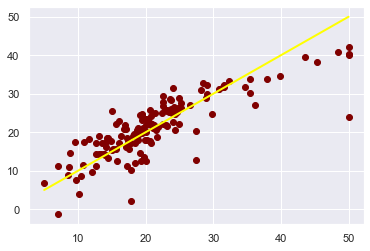

In [46]:
plt.scatter(y_test, preds, color='maroon')
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='yellow', lw=2)
plt.show()

In [47]:
import pickle
file = "final_linear_model.pickle"
pickle.dump(lr, open(file, 'wb'))

In [48]:
load_model = pickle.load(open(file, 'rb'))
a = load_model.predict([[0.18715116, -0.48772236, -0.50645674, -0.66660821, -0.85792914,
        0.55208139, -0.54607682, -0.38609067]])

In [49]:
X_test[0]

array([ 0.18715116, -0.48772236, -0.50645674, -0.66660821, -0.85792914,
        0.55208139, -0.54607682, -0.38609067])

In [50]:
a

array([28.71656589])

In [51]:
y_test[0]

24.0